* * *
<pre> NYU Paris            <i> Artificial intelligence - Summer 2023 </i></pre>
* * *


<h1 align="center"> Lab 4: The monolayer perceptron </h1>

<pre align="left"> May 25th 2023               <i> Author: Hicham Janati </i></pre>
* * *


##### Goals:
- Implement your first classifier
- Understand the concept of model complexity


Let's a generate a simple toy dataset.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, n_features=2, cluster_std=0.3, random_state=0)

labels = y.copy()
y[y==0] = -1

print("Shape of the data", X.shape)
print("labels:", y)

Shape of the data (100, 2)
labels: [ 1  1 -1 -1  1 -1 -1  1 -1  1 -1  1 -1 -1  1  1  1 -1  1  1 -1 -1  1 -1
  1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1 -1 -1  1  1  1  1
 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1
  1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1 -1 -1
  1  1 -1  1]


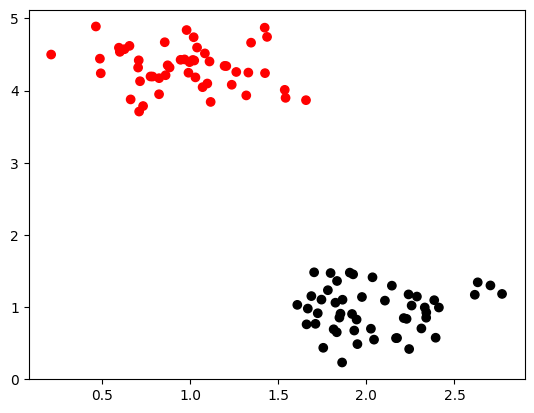

In [3]:

colors = ["red", "black"]
scatter_colors = np.array(colors)[labels]

plt.figure()
plt.scatter(X[:, 0], X[:, 1], color=scatter_colors)
plt.show()

A monolayer perceptron is a geometric method that performs classification using a linear decision function of the form:
$$ f(x) = \langle w, x\rangle + \theta$$
or with a different notation:
$$ f(x) = w^\top x + \theta$$


### Question 1

Given a sample $x$, a prediction is then given by taking the sign of $f$:

$ prediction(x) = 1$ if $f(x) \geq 0$ and -1 if $f(x) < 0$.

Complete the function below that performs gradient descent to optimize the parameters $w$ and $\theta$.

The loss function that we minimize is:

$$l_i(w) = (-y_i \sum_{i=1}^n x_i w)_+$$

Hint: Take a look at the lectures slides to refresh your memory on how to update the parameters

In [14]:
def plot(w, theta, X, ii):
    point0 = [0., 3.]
    point1 = [-theta / w[1], -(theta + w[0] * 3)/w[1]]

    colors = ["red", "black"]
    scatter_colors = np.array(colors)[labels]

    plt.figure()
    plt.plot(point0, point1)
    plt.scatter(X[:, 0], X[:, 1], color=scatter_colors)
    plt.scatter(X[ii, 0], X[ii, 1], color="gold")
    plt.show()
    
def gradient_descent(X, y, step_size=0.001, n_iter=100):
    n_samples, n_features = X.shape
    # do initialization
    w = np.zeros(n_features)
    theta = 0.
    for t in range(n_iter):
        for ii in range(n_samples):
            if ## TODO :
                # plot(w, theta, X, ii)
                theta = 
                w = 
    plot(w, theta, X, ii)
    return w, theta

/var/folders/7j/_4cwcgyn5plc4qmvq87jv10m0000gn/T/ipykernel_13522/731539697.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  point1 = [-theta / w[1], -(theta + w[0] * 3)/w[1]]


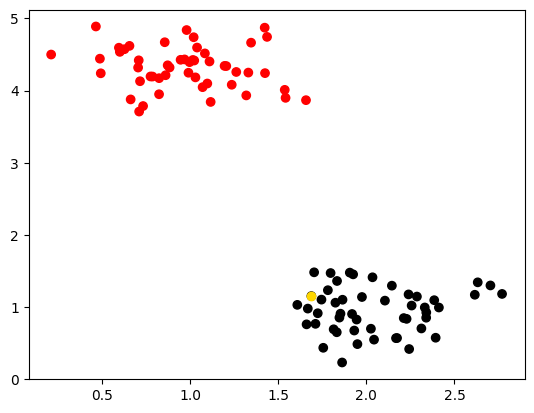

[0. 0.] 0.001


In [15]:
w, theta = gradient_descent(X, y)
print(w, theta)

$ f(x) = w^\top x + \theta $ with $\theta \in \mathbb{R}$

$f(x) = \sum_{j=1}^d w_j x_j  + \theta$

### Question 2
The funciton $f$ is parametrized using one slope vector $w$ and the offset scalar $\theta$.
Can you think of a change of variable and change to the data X such that this parametrization is reduced to only one parameter $w$ to get a function of the form:

$$ f(x') = w'^\top x' = \sum_{j=1}^{d+1} w'_j x'_j$$ 


### Question 3
Implement this change in your model and update the gradient descent function accordingly.

### Question 4
Write a function that uses the learned parameters to make predictions.

### Question 5
Time to write a proper classifier object that following the sklearn API. We import the sklearn BaseEstimator model and customize it with our gradient descent function. Complete the following cell:

In [97]:
from sklearn.base import BaseEstimator

class Perceptron():
    def __init__(self, step_size=0.001, n_iter=1000):
        self.step_size = step_size
        self.n_iter = n_iter
    
    def fit(self, X, y):
        
    def predict(self, X):
        
    def score(self, X, y):
        ypred = self.predict(X)
        s = (ypred == y).mean()
        return s

In [98]:
mymodel = Perceptron(step_size=0.01, n_iter=100)
mymodel.fit(X, y)
mymodel.score(X, y)


1.0

In [99]:
print(mymodel)

### Question 6
Time to properly evaluate our model. Divide the data into train-test.
Create an instance of your perceptron, train it on the data and compute a test accuracy score. 

Shape of the data (200, 3)
labels: [ 1  1  1  1 -1 -1 -1 -1  1 -1  1  1 -1 -1  1 -1  1  1  1  1  1 -1 -1 -1
 -1 -1  1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1  1 -1  1
 -1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1 -1
  1  1  1  1  1  1 -1  1 -1  1 -1 -1  1 -1 -1  1  1  1 -1 -1 -1 -1  1  1
  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1 -1  1  1  1  1  1
 -1  1 -1  1  1  1 -1  1  1 -1  1 -1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1
  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1
 -1 -1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1  1  1  1 -1  1 -1
  1  1  1  1 -1 -1 -1 -1]


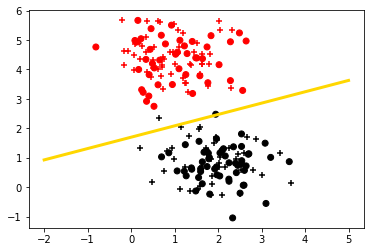

In [117]:
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=0.7, random_state=0)

X = np.hstack((X, np.ones((len(X), 1))))
labels = y.copy()
y[y==0] = -1

print("Shape of the data", X.shape)
print("labels:", y)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# TODO
#
#
# w = 

point0 = [-2, 5.]
point1 = [-w[2] / w[1], -(w[2] + w[0] * 3)/w[1]]


scatter_colors_train = np.array(colors)[(y_train > 0).astype(int)]
scatter_colors_test = np.array(colors)[(y_test > 0).astype(int)]

plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], color=scatter_colors_train)
plt.plot(point0, point1, lw=3, color="gold")
plt.scatter(X_test[:, 0], X_test[:, 1], color=scatter_colors_test, marker="+")
plt.show()

In [118]:
mymodel.score(X_train, y_train)

1.0

In [119]:
mymodel.score(X_test, y_test)

0.97

### Question 7:
Complete the code below to plot the accuracy curve for a list of `train_size`. What do you notice ?

In [ ]:
train_sizes = np.linspace(0.1, 0.9, 10)

accuracies = []

for test_size in train_sizes:
    accuracies.append(train_size)
    ##
    
